In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get a summary of the dataset
print(data.describe())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slop

In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])

# Display the first few rows to confirm encoding
print(data.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172               0      0.0       Up             0  
1    156               0      1.0     Flat             1  
2     98               0      0.0       Up             0  
3    108               1      1.5     Flat             1  
4    122               0      0.0       Up             0  


In [3]:
# Define features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (734, 11)
y_train shape: (734,)
X_test shape: (184, 11)
y_test shape: (184,)


In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])

# Encode the 'ST_Slope' feature
X_train['ST_Slope'] = ordinal_encoder.fit_transform(X_train[['ST_Slope']])
X_test['ST_Slope'] = ordinal_encoder.transform(X_test[['ST_Slope']])

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.842391304347826

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184


Confusion Matrix:
[[68  9]
 [20 87]]


In [7]:
# Create interaction terms between numerical features
X_train_interact = X_train.copy()
X_test_interact = X_test.copy()

# Example: Age multiplied by MaxHR
X_train_interact['Age_MaxHR'] = X_train_interact['Age'] * X_train_interact['MaxHR']
X_test_interact['Age_MaxHR'] = X_test_interact['Age'] * X_test_interact['MaxHR']

# Display the first few rows to confirm the creation of interaction terms
print(X_train_interact.head())


     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
795   42    1              2        120          240          1           1   
25    36    1              2        130          209          0           1   
84    56    1              0        150          213          1           1   
10    37    0              2        130          211          0           1   
344   51    1              0        120            0          1           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Age_MaxHR  
795    194               0      0.8       0.0       8148  
25     178               0      0.0       2.0       6408  
84     125               1      1.0       1.0       7000  
10     142               0      0.0       2.0       5254  
344    104               0      0.0       1.0       5304  


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical features for scaling
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Apply Standardization to the training data
X_train_scaled = X_train_interact.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_interact[numerical_features])

# Apply Standardization to the testing data
X_test_scaled = X_test_interact.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test_interact[numerical_features])

# Display the first few rows of scaled data to confirm
print(X_train_scaled.head())


          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
795 -1.245067    1              2  -0.708985     0.372803          1   
25  -1.886236    1              2  -0.166285     0.086146          0   
84   0.250993    1              0   0.919115     0.123134          1   
10  -1.779375    0              2  -0.166285     0.104640          0   
344 -0.283314    1              0  -0.708985    -1.846478          1   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  Age_MaxHR  
795           1  2.284353               0 -0.097061       0.0       8148  
25            1  1.652241               0 -0.836286       2.0       6408  
84            1 -0.441628               1  0.087745       1.0       7000  
10            1  0.229991               0 -0.836286       2.0       5254  
344           1 -1.271274               0 -0.836286       1.0       5304  


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.8913043478260869

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.93      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix:
[[70  7]
 [13 94]]


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Set max_features explicitly to 'sqrt'
}

# Initialize the Random Forest classifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the scaled testing data using the best model
y_pred_best = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Random Forest Classifier Accuracy:", accuracy_best)

# Classification report for the best model
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix for the best model
print("\nConfusion Matrix for the Best Model:")
print(confusion_matrix(y_test, y_pred_best))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Random Forest Classifier Accuracy: 0.8913043478260869

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix for the Best Model:
[[69  8]
 [12 95]]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, plot_precision_recall_curve

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
y_prob_best = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 3. Precision-Recall Curve
average_precision = average_precision_score(y_test, y_prob_best)
disp = plot_precision_recall_curve(best_rf_model, X_test_scaled, y_test)
disp.ax_.set_title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 4. Feature Importance Plot
feature_importance = best_rf_model.feature_importances_
feature_names = X_train_scaled.columns
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.show()


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

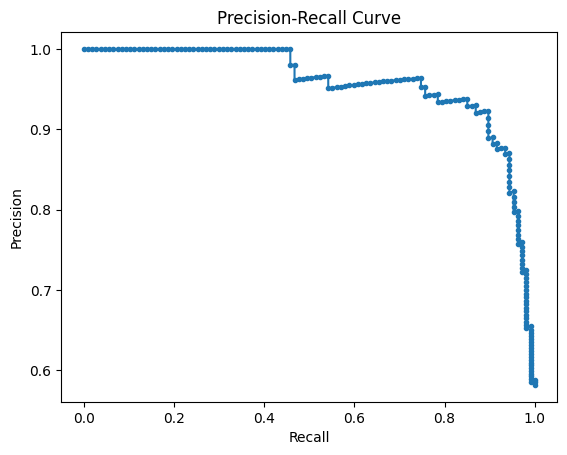

Average Precision Score: 0.96


In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob_best = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculate average precision score
average_precision = average_precision_score(y_test, y_prob_best)
print(f'Average Precision Score: {average_precision:.2f}')


In [15]:
import joblib

# Save the trained model to a file
model_filename = 'Heart_failure_prediction_model.pkl'
joblib.dump(best_rf_model, model_filename)


['Heart_failure_prediction_model.pkl']